In [21]:
# Basic module
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
%matplotlib inline

# Machine Learning module
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Evaluation method
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [22]:
# 前処理済みデータ(pickle)読み込み
train = pd.read_pickle('../1. data/train_pre_proccessing.pkl')
test = pd.read_pickle('../1. data/test_pre_proccessing.pkl')
submit = pd.read_csv('../1. data/sample_submit.csv', header=None, names=['id','value'])

In [23]:
# 確認
train.head()

,mpg,cylinders_std,displacement_std,weight_std,acceleration_std,model year_std,origin_std
0,23.059782,0.500031,-0.515790,0.133022,1.185170,0.939285,-0.553591
1,17.674521,1.737730,1.462149,2.423904,-0.790582,-1.109320,-0.553591
2,17.136353,1.737730,1.010049,0.075785,-0.925440,0.683210,-0.553591
3,22.664666,0.500031,1.933087,-0.739496,-0.046018,-1.365395,-0.553591
4,17.872018,1.737730,2.206231,-0.662714,-2.514097,-1.621471,-0.553591


In [24]:
test.head()

,cylinders_std,displacement_std,weight_std,acceleration_std,model year_std,origin_std
0,-0.737669,-0.911378,-1.004741,-0.110913,1.195361,-0.553591
1,-0.737669,-0.920797,0.000399,0.017197,0.683210,-0.553591
2,-0.737669,-0.986728,0.121854,1.116183,0.171059,-0.553591
3,-0.737669,-0.515790,0.121854,-0.672902,1.451437,0.764483
4,-0.737669,-0.694747,0.489009,-0.713380,-0.853244,0.764483


In [25]:
submit

,id,value
0,1,0.0
1,2,0.0
2,5,0.0
3,6,0.0
4,8,0.0
...,...,...
495,992,0.0
496,993,0.0
497,996,0.0
498,998,0.0


In [26]:
# データ作成
X = train.drop('mpg', axis=1)
y = train['mpg'].copy().values

In [27]:
# データ分割
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=True)

-------------------------
#### ■ モデル作成
-------------------------

In [31]:
# 重回帰
# インスタンス生成
linear = LinearRegression(fit_intercept=True)
ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5)

# 学習
linear.fit(train_X, train_y)
ridge.fit(train_X, train_y)
 
# 予測
y_pre_linear = linear.predict(test_X)
y_pre_ridge = ridge.predict(test_X)

# 評価
# print('Mean_abs_error:{:.3f}'.format(mean_absolute_error(test_y, y_pre)))
print('Mean_square_error(Linear):{:.3f}'.format(mean_squared_error(test_y, y_pre_linear)))
print('Mean_square_error(Ridge):{:.3f}'.format(mean_squared_error(test_y, y_pre_ridge)))

Mean_square_error(Linear):16.559
Mean_square_error(Ridge):16.563


<BarContainer object of 6 artists>

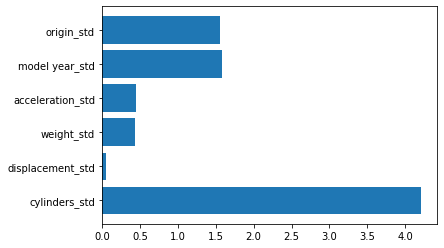

In [9]:
# 各回帰係数確認
columns = train_X.columns

plt.barh(columns, abs(linear.coef_))

In [10]:
# RandomForest
# インスタンス生成
model = RandomForestRegressor()

# 学習
model.fit(train_X, train_y)
 
# 予測
y_pre = model.predict(test_X)

# 評価
# print('Mean_abs_error:{:.3f}'.format(mean_absolute_error(test_y, y_pre)))
print('Mean_square_error:{:.3f}'.format(mean_squared_error(test_y, y_pre)))

Mean_square_error:8.715


C:\Users\tatsu\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [11]:
# Adaboost
# インスタンス生成
model = AdaBoostRegressor(
             base_estimator= DecisionTreeRegressor(),
             n_estimators=100,
             loss='linear'
)

# 学習
model.fit(train_X, train_y)
 
# 予測
y_pre = model.predict(test_X)

# 評価
# print('Mean_abs_error:{:.3f}'.format(mean_absolute_error(test_y, y_pre)))
print('Mean_square_error:{:.3f}'.format(mean_squared_error(test_y, y_pre)))

Mean_square_error:12.003


-----------------------------
##### 提出用
-----------------------------

In [12]:
# RandomForestで提出
regressor = RandomForestRegressor(
        n_estimators=100,
        criterion='mse'
)

# 学習
regressor.fit(X,y)

y_pre = regressor.predict(test)

In [13]:
# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201111.csv',header=False, index=False)

--------------------------
##### ■ 特徴選択
---------------------------

In [14]:
# feature selection
from sklearn.feature_selection import RFECV # wrapper method

In [15]:
dt = DecisionTreeRegressor()
select = RFECV(estimator=dt, cv=5)
select.fit(train_X, train_y)

RFECV(cv=5,
      estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                      max_features=None, max_leaf_nodes=None,
                                      min_impurity_decrease=0.0,
                                      min_impurity_split=None,
                                      min_samples_leaf=1, min_samples_split=2,
                                      min_weight_fraction_leaf=0.0,
                                      presort=False, random_state=None,
                                      splitter='best'),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [16]:
# 重要な特徴
train_X.columns[select.support_]

Index(['cylinders_std', 'displacement_std', 'acceleration_std',
       'model year_std'],
      dtype='object')

In [17]:
select_columns = train_X.columns[select.support_]
train_X_selected = train_X[select_columns]
train_X_selected

,cylinders_std,displacement_std,acceleration_std,model year_std
329,-0.737669,-0.515790,-0.811356,-0.085017
172,-0.737669,-0.515790,1.130398,1.451437
323,-0.737669,-0.920797,-0.137692,1.195361
36,-0.737669,-0.911378,-0.083014,1.195361
16,-0.737669,-0.515790,1.763109,-0.085017
...,...,...,...,...
60,-0.737669,-0.920797,-0.824573,-1.621471
443,-0.737669,-0.920797,0.064739,1.451437
192,0.500031,-0.515790,1.313517,0.939285
490,0.500031,0.049335,0.845635,-0.853244


In [18]:
test_X_selected = test_X[select_columns]
test_X_selected

,cylinders_std,displacement_std,acceleration_std,model year_std
119,-0.737669,0.350736,-0.907720,-1.365395
120,-0.737669,-0.515790,0.801740,-0.341093
394,-0.737669,-0.986728,1.105608,0.171059
29,0.500031,1.933087,-0.029840,-1.365395
427,-0.737669,-0.412184,0.013467,0.939285
...,...,...,...,...
350,-0.737669,-0.562884,0.005101,0.939285
76,0.500031,-0.515790,1.251766,0.939285
277,1.737730,0.341317,-0.014735,0.427134
196,0.500031,0.284804,0.784107,-0.085017


In [19]:
# RandomForest
regressor = RandomForestRegressor(
    n_estimators=200, 
    criterion='mse')
regressor.fit(train_X_selected, train_y)
y_pre = regressor.predict(test_X_selected.values)
print('Mean_square_error:{:.3f}'.format(mean_squared_error(test_y, y_pre)))

Mean_square_error:10.521


In [20]:
# RandomForestで提出
regressor = RandomForestRegressor(
        n_estimators=100,
        criterion='mse'
)

# 学習
regressor.fit(X[select_columns],y)

y_pre = regressor.predict(test[select_columns])

# 提出用データ作成
submit['value'] = y_pre
submit.to_csv('submit_20201111_v2.csv',header=False, index=False)